In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

%matplotlib inline

In [3]:
price_1 = pd.read_csv("sample_data/msft_price.csv")
price_2 = pd.read_csv("sample_data/tsla_price.csv")

In [7]:
price_1.index = pd.to_datetime(price_1['Date'])
price_2.index = pd.to_datetime(price_2['Date'])


In [ ]:
df = pd.DataFrame(
    {
        'x': price_1['Close'].pct_change(),
        'y': price_2['Close'].pct_change(),
    }
)
df.dropna(inplace=True)

In [19]:
# random_state=42 to ensure reproducible
df_in, df_out= train_test_split(df, test_size=0.2, random_state=42)

In [52]:
df

,x,y
Date,,
2017-01-03,0.007081,0.015443
2017-01-04,-0.004474,0.046085
2017-01-05,0.000000,-0.001057
2017-01-06,0.008668,0.009967
2017-01-09,-0.003182,0.009912
...,...,...
2024-08-12,0.001946,-0.012550
2024-08-13,0.017699,0.052357
2024-08-14,0.006884,-0.031035


In [58]:
x, y = pd.DataFrame(df['x']), df['y'] ### have to make sure x is n x 1
linreg = LinearRegression(fit_intercept=False)
linreg.fit(x, y)
yhat = linreg.predict(x)

In [59]:
df['yhat'] = yhat

In [60]:
df

,x,y,yhat
Date,,,
2017-01-03,0.007081,0.015443,0.006519
2017-01-04,-0.004474,0.046085,-0.004119
2017-01-05,0.000000,-0.001057,0.000000
2017-01-06,0.008668,0.009967,0.007980
2017-01-09,-0.003182,0.009912,-0.002930
...,...,...,...
2024-08-12,0.001946,-0.012550,0.001791
2024-08-13,0.017699,0.052357,0.016294
2024-08-14,0.006884,-0.031035,0.006338


Text(0.5, 1.0, 'msft return against tsla return\nintercept=0.0000, coef=[0.92588157]')

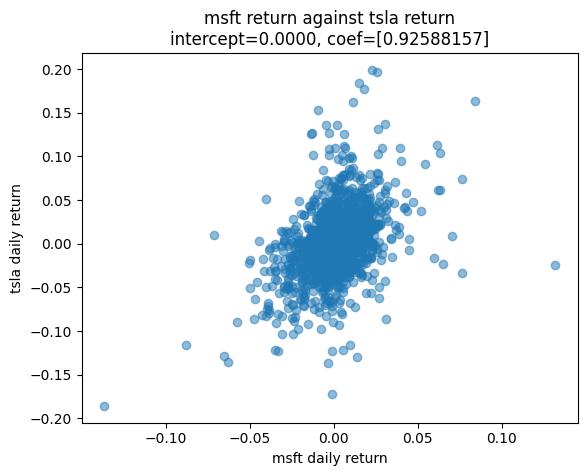

In [ ]:
plt.scatter(yhat, y, alpha=0.5)
# plt.plot(x, trendline, color='red')
plt.xlabel('msft daily return'); plt.ylabel('tsla daily return')
plt.title('msft return against tsla return\nintercept={:.4f}, coef={}'.format(linreg.intercept_, linreg.coef_))